<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Projects/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, adam, RMSprop

from keras.utils import np_utils
from keras import backend as K

# visualization
import matplotlib.pyplot as plt

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data preprocessing

In [0]:
if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
  x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
  input_shape = (1, 28, 28)
else:
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

# convert class vectors to binary class matrics
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [50]:
print("The shape of x_train: {}".format(x_train.shape))
print("The shape of y_train: {}".format(y_train.shape))
print("The shape of x_test: {}".format(x_test.shape))
print("The shape of y_test: {}".format(y_test.shape))

The shape of x_train: (60000, 28, 28, 1)
The shape of y_train: (60000, 10)
The shape of x_test: (10000, 28, 28, 1)
The shape of y_test: (10000, 10)


In [51]:
"""
nrows = 2
ncols = 5
plt.figure(figsize = (10, 4))
for i in range(10):
  print("The true label: {}".format(y_train[i]))
  plt.subplot(nrows, ncols, i + 1)  
  plt.imshow(x_train[i]) # cmap = "gray" 
  plt.axis("Off")
plt.show()
"""

'\nnrows = 2\nncols = 5\nplt.figure(figsize = (10, 4))\nfor i in range(10):\n  print("The true label: {}".format(y_train[i]))\n  plt.subplot(nrows, ncols, i + 1)  \n  plt.imshow(x_train[i]) # cmap = "gray" \n  plt.axis("Off")\nplt.show()\n'

## Data visualization

In [0]:
#data_one = y_train.where(y_train[y_train == 1])

In [53]:
# print the first 5 images from the training dataset
"""
for i in range(5):
  print("The true label: {}".format(y_train[i]))
  plt.axis("Off")
  plt.imshow(x_train[i]) # cmap = "gray"
  plt.show()
  print()
"""

'\nfor i in range(5):\n  print("The true label: {}".format(y_train[i]))\n  plt.axis("Off")\n  plt.imshow(x_train[i]) # cmap = "gray"\n  plt.show()\n  print()\n'

## Mdoel building

In [54]:
epochs = 100

# define CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.25))  # one solution for overfitting, dropout

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(10, activation ='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = adam(), metrics = ['accuracy'])

history = model.fit(x_train, y_train,
         batch_size = 128, 
         epochs = epochs,
         verbose = 1,
         validation_data = (x_test, y_test))

score = model.evaluate(x_train, y_train, verbose = 0) 
print("Train Acc:", score[1])

model.evaluate(x_test, y_test, verbose = 0) 

print("Test Acc:", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 142us/step - loss: 0.1651 - acc: 0.9504 - val_loss: 0.0657 - val_acc: 0.9786
Epoch 2/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.0460 - acc: 0.9859 - val_loss: 0.0432 - val_acc: 0.9850
Epoch 3/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.0299 - acc: 0.9903 - val_loss: 0.0331 - val_acc: 0.9895
Epoch 4/100
60000/60000 [==============================] - 8s 134us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0384 - val_acc: 0.9884
Epoch 5/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.0145 - acc: 0.9955 - val_loss: 0.0363 - val_acc: 0.9889
Epoch 6/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.0096 - acc: 0.9970 - val_loss: 0.0373 - val_acc: 0.9881
Epoch 7/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.0093 - acc: 0.9968 - val_loss: 0.

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

The best validation accuracy score: 99.11%


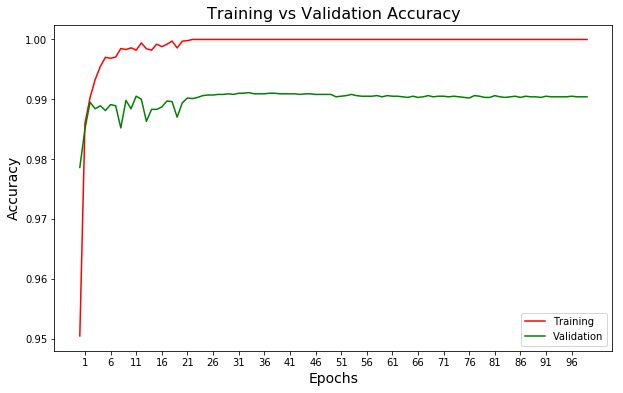

In [73]:
import numpy as np
print("The best validation accuracy score: {}%".format(max(history.history["val_acc"]) * 100))
plt.figure(figsize = (10, 6))
plt.plot(history.history["acc"], color = "r")
plt.plot(history.history["val_acc"], color = "g")
plt.xticks(np.arange(1, epochs + 1, 5))
plt.legend(["Training", "Validation" ])
plt.title("Training vs Validation Accuracy", size = 16)
plt.xlabel("Epochs", size = 14)
plt.ylabel("Accuracy", size = 14)
plt.savefig("Accuracy.png")
plt.show()

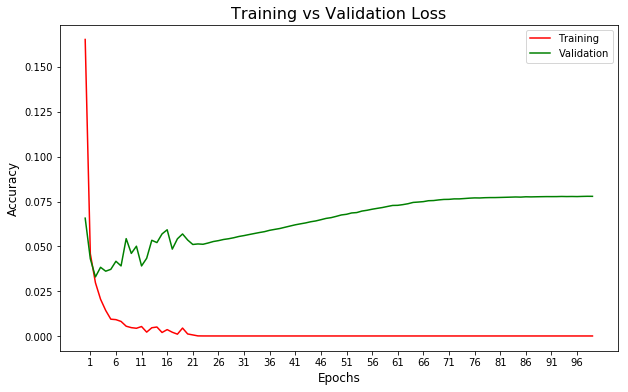

In [64]:
plt.figure(figsize = (10, 6))
plt.plot(history.history["loss"], color = "r")
plt.plot(history.history["val_loss"], color = "g")
plt.xticks(np.arange(1, epochs + 1, 5))
plt.legend(["Training", "Validation" ])
plt.title("Training vs Validation Loss", size = 16)
plt.xlabel("Epochs", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.savefig("Loss.png")
plt.show()